<a href="https://colab.research.google.com/github/Sahana-M/Keras-implementations-DNN-CNN/blob/master/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers  import Dense
from keras.optimizers  import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random

In [0]:
np.random.seed(0)

In [0]:
(X_train , y_train), (X_test, y_test) = mnist.load_data()

In [32]:
print(y_train.shape[0])
print(y_test.shape[0])

60000
10000


In [0]:
assert(X_train.shape[0]==y_train.shape[0]), "not equal , ERROR!!"
assert(X_test.shape[0]==y_test.shape[0]), "not equal , ERROR!!"
assert(X_train.shape[1:] == (28,28)), "shape error!"
assert(X_test.shape[1:] == (28,28)), "shape error!"

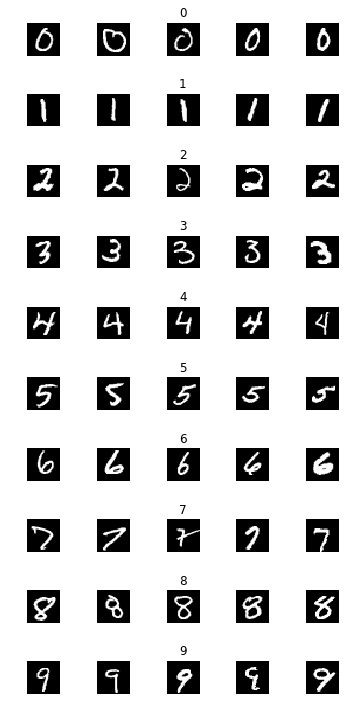

In [34]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)),:,:], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples .append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of images')

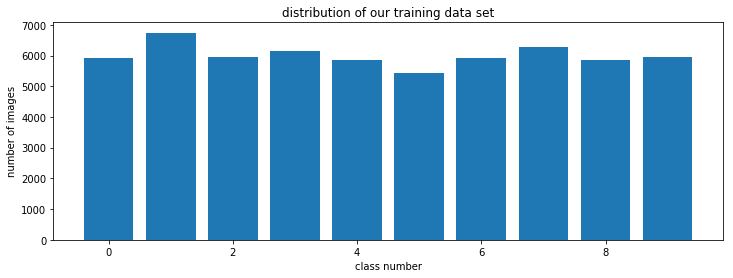

In [35]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("distribution of our training data set")
plt.xlabel("class number")
plt.ylabel("number of images")

In [0]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

USING LeNet based model to classify our MNIST data set

our LeNet contains 2 convolutional layer and 2 pooling layer



*   Image
*   Convolutional layer 1
*   Pooling layer 
*   Convolutional layer 2
*   Pooling layer 2
*   Fully connnected nerual network
*   Output










In [40]:
model = leNet_model()
print(model.summary())

W0626 09:27:29.644879 140420511319936 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [0]:
#definign lenet model function

def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5) , input_shape =(28,28,1), activation='relu'))
  
  #image reduces to 24x24 of depth - 30 convolved images
  #750 (5x5 = 25 parameters in one filter , total 30 filters, 25x30 = 750, 750+30(biases) = 780 parameters)
  #image reduces to 12x12 of depth - 30 pooled images
  
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  #15(no of kernel filters) x 30(no of pooled images) x 3x3(kernel filter size) = 4050 parameters + 15 biases = 4065 parameters 
  
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  #result is a 5x5 image with depth 15 (15 pooled images)
  
  model.add(Flatten())
  
  #5x5 = 25 pixels in one image x 15 images = 25x15 = 375 parameters as input to NN
  
  model.add(Dense(500, activation = 'relu'))
  
  #Dropout layer
  model.add(Dropout(0.5))
  
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr =0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [41]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.2489 - acc: 0.9196 - val_loss: 0.0486 - val_acc: 0.9855
Epoch 2/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0693 - acc: 0.9786 - val_loss: 0.0393 - val_acc: 0.9885
Epoch 3/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0607 - acc: 0.9813 - val_loss: 0.0363 - val_acc: 0.9893
Epoch 4/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0522 - acc: 0.9842 - val_loss: 0.0389 - val_acc: 0.9895
Epoch 5/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0450 - acc: 0.9862 - val_loss: 0.0324 - val_acc: 0.9905
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0437 - acc: 0.9860 - val_loss: 0.0376 - val_acc: 0.9897
Epoch 7/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0381 - acc: 0.9884 - val_loss: 0.0376 - val_acc:

Text(0.5, 0, 'epoch')

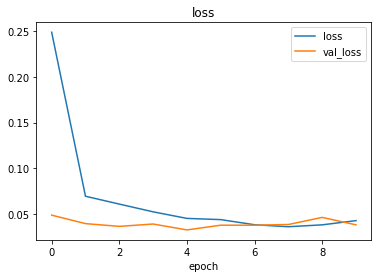

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

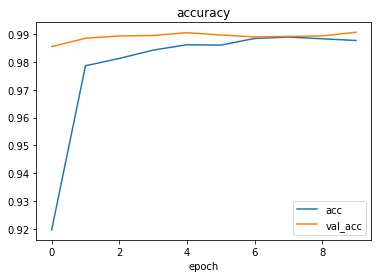

In [43]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')

In [44]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('test score', score[0])
print('test accuracy', score[1])


test score 0.04044948236755963
test accuracy 0.989


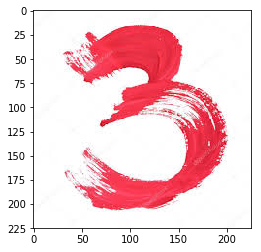

In [45]:
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

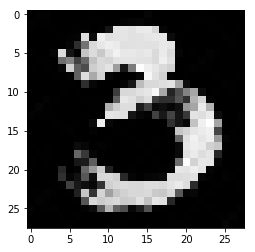

In [46]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [0]:
image = image/255
image = image.reshape(1,28,28,1)

In [48]:
prediction = model.predict_classes(image)
print("predicted digit", str(prediction))

predicted digit [3]


In [0]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)


visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)


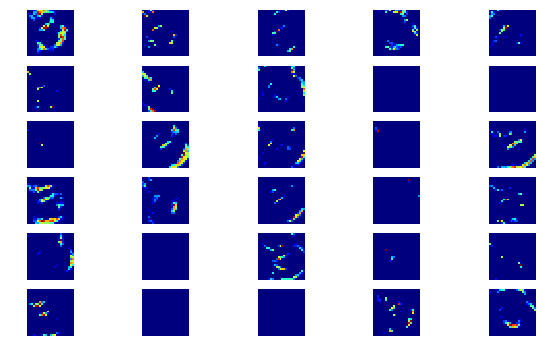

In [53]:
#Features detected in 1st convolutional layer

plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')
  

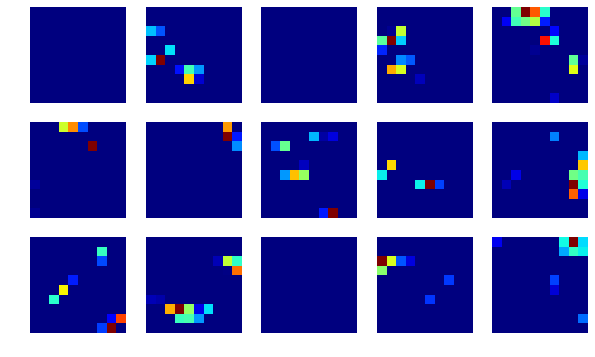

In [54]:
#Features detected in 2nd convolutional layer

plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')
  
  